<a href="https://colab.research.google.com/github/valeriaarciga/DataScience/blob/main/DataTransformation_ValeriaArcigaValencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M2. Actividad 5 Transformación: Normalización, Agregación y Codificación de Datos

Valeria Arciga Valencia

# Data Transformation

Data in different scales.

Values in a dataset might have a variety of different magnitudes, ranges, or scales.
Algorithms that use distance as a parameter may not weigh all these in the same way.
There are various data transformation techniques that are used to transform the features of our data so that they use the same scale, magnitude, or range.
This ensures that each feature has an appropriate effect on a model's predictions.
Some features in our data might have high-magnitude values (for example, annual salary), while others might have relatively low values (for example, the number of years worked at a company). Just because some data has smaller values does not mean it is less significant.

Reference: Data Science with Python
By Rohan Chopra, Aaron England, Mohamed Noordeen Alaudeen
July 2019

https://subscription.packtpub.com/book/data/9781838552862/1/ch01lvl1sec08/data-in-different-scales

##Normalización

Empleando el dataset de Wholesale se ha ejecutado el notebook, en donde se ha comenzado el proceso de normalización con Python

### Implementing Scaling Using the Standard Scaler Method

Importación de librería, lectura del dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Wholesale customers data.csv')

Muestra de los datos

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Tipos de datos

In [ ]:
dtypes = df.dtypes
dtypes

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


Información general del DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Perform standard scaling and print the first five rows of the new dataset. To do so, use the StandardScaler() class from sklearn.preprocessing and implement the fit_transorm() method.
Using the StandardScaler method, we will scale the data into a uniform unit over all the columns.
The values of all the features will be converted into a uniform range of the same scale. Because of this, it becomes easier for the model to make predictions.

###Escalado Estándar Z Score

In [ ]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit_transform(df)
scaled_frame = pd.DataFrame(std_scale, columns=df.columns)

scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## Implementing Scaling Using the MinMax Scaler Method

Perform MinMax scaling and print the initial five values of the new dataset. To do so, use the MinMaxScaler() class from sklearn.preprocessing and implement the fit_transorm() method. Add the following code to implement this:
Using the MinMaxScaler method, we will scale the data into a uniform unit over all the columns

###Escalado Min Max

In [ ]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit_transform(df)
scaled_frame = pd.DataFrame(minmax_scale,columns=df.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


##(b) Escribe el código requerido para obtener

###1) el total de lo que se gastó de leche por región

In [ ]:
df.groupby('Region')['Milk'].sum()

,Milk
Region,
1,422454
2,239144
3,1888759


En la sección del DataFrame se observa la suma de la cantidad de leche por cada una de las regiones

###2) el total de lo que se gastó de abarrotes por canal.

In [ ]:
df.groupby('Channel')['Grocery'].sum()

,Grocery
Channel,
1,1180717
2,2317845


El total de gasto de abarrotes por canal se muestra en el DataFrame

##One Hot Encoding

###Ejercicio en PANDAS

In [2]:
import pandas as pd

df = pd.DataFrame({
    "Nombre": ["Ana", "Luis", "Sofía", "Pedro", "Elena"],
    "Ciudad": ["Monterrey", "Guadalajara", "CDMX", "Monterrey", "Guadalajara"],
    "Edad": [25, 30, 28, 35, 27]
})

df


,Nombre,Ciudad,Edad
0,Ana,Monterrey,25
1,Luis,Guadalajara,30
2,Sofía,CDMX,28
3,Pedro,Monterrey,35
4,Elena,Guadalajara,27


Aplicación de One-Hot Encoding

In [3]:
# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["Ciudad"])

df_encoded

,Nombre,Edad,Ciudad_CDMX,Ciudad_Guadalajara,Ciudad_Monterrey
0,Ana,25,False,False,True
1,Luis,30,False,True,False
2,Sofía,28,True,False,False
3,Pedro,35,False,False,True
4,Elena,27,False,True,False


###Aplicación de sklearn

In [6]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({
    "Nombre": ["Ana", "Luis", "Sofía", "Pedro", "Elena"],
    "Ciudad": ["Monterrey", "Guadalajara", "CDMX", "Monterrey", "Guadalajara"],
    "Edad": [25, 30, 28, 35, 27]
})
df

,Nombre,Ciudad,Edad
0,Ana,Monterrey,25
1,Luis,Guadalajara,30
2,Sofía,CDMX,28
3,Pedro,Monterrey,35
4,Elena,Guadalajara,27


In [10]:
encoder = OneHotEncoder()
encoded_cities = encoder.fit_transform(df[["Ciudad"]])

encoded_cities_dense = encoded_cities.toarray()
encoded_df = pd.DataFrame(encoded_cities_dense, columns=encoder.get_feature_names_out(["Ciudad"]))

df_final = pd.concat([df.drop(columns=["Ciudad"]), encoded_df], axis=1)

df_final

,Nombre,Edad,Ciudad_CDMX,Ciudad_Guadalajara,Ciudad_Monterrey
0,Ana,25,0.0,0.0,1.0
1,Luis,30,0.0,1.0,0.0
2,Sofía,28,1.0,0.0,0.0
3,Pedro,35,0.0,0.0,1.0
4,Elena,27,0.0,1.0,0.0


##e) Mapa Mental

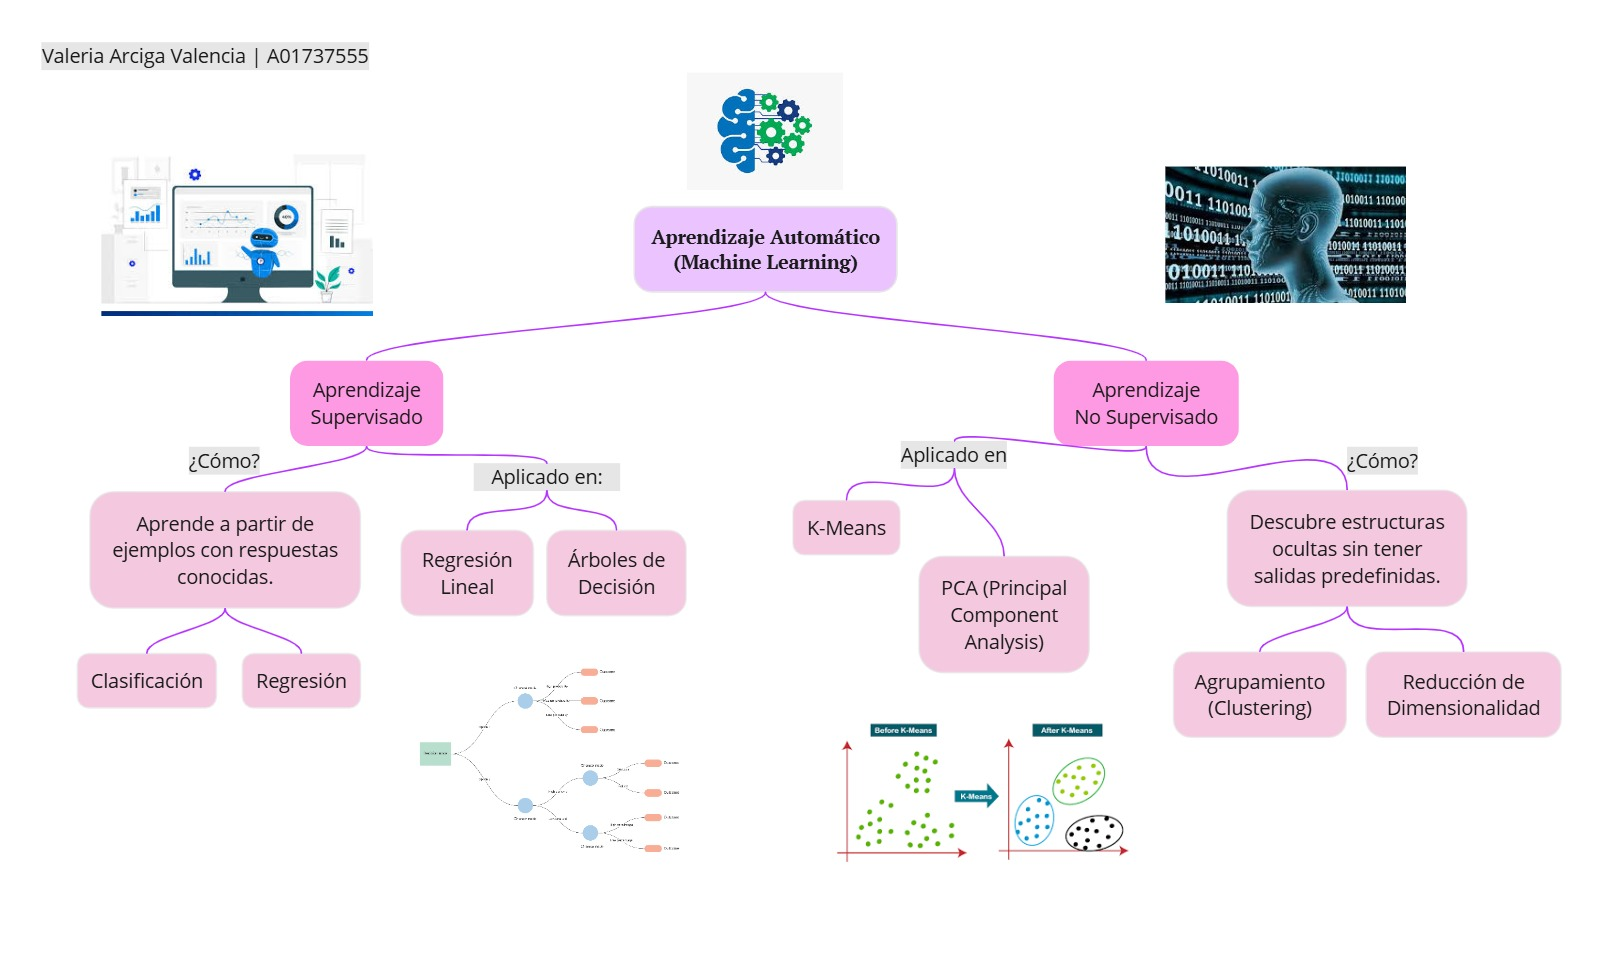

##CODEV2. K-Means Clustering

###Importación de librerías lectura de documento

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Import necessary libraries
import pandas as pd

# Path to the Excel file
file_path = '/content/drive/MyDrive/datos/Course Evaluation (Responses).xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()

,Timestamp,Name of Student,Registration number,Describe the course contents and course design in terms of level of preparedness [Course contents],Describe the course contents and course design in terms of level of preparedness [Teacher preparedness],Describe the course contents and course design in terms of level of preparedness [Student engagement],Describe the course contents and course design in terms of level of preparedness [Course coverage],Describe the course contents and course design in terms of level of preparedness [Discussion and respond to questions],How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at start of course],How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at end of course],...,Skill and responsiveness of the instructor [Instructor was available and helpful],Skill and responsiveness of the instructor [Grading was prompt and had useful feedback],Course content [Learning objectives were clear],Course content [Course content was organized and well planned],Course content [Course workload was appropriate],Course content [Course organized to allow all students to participate fully],What aspects of this course were most useful or valuable?,How would you improve this course?,Describe the experience of engagement in the project assigned in this course,Name one skill or aspect that you gained after completing this course
0,2024-05-25 14:54:06.007,Arhum Waseem,1024-BSME-FET/F-21,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,...,Neutral,Agree,Agree,Agree,Agree,Agree,Design For Maximum Output,By Providing Slides To Students,Learning experience beyond text book level ext...,Life long learning
1,2024-05-25 14:56:59.385,Saud Asif,990-FET/BSME/F21,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,"Brain Storming for solution of a problem, proj...",Introduce projects that connect students with ...,Learning experience beyond text book level ext...,Identifying the end users and Response gatheri...
2,2024-05-25 14:59:13.970,Muhammad Hammad Sohail,1012-FET/BSME/F21,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,"We learn different skills like gantt chart, df...",One things i wanna improve in this course is i...,Learning experience beyond text book level ext...,"Product development cycle, Use of Modern tools..."
3,2024-05-25 15:07:56.230,Muhammad Amir Taj,997/F21/BSME,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,The course had well-defined objectives and goa...,I think the course was perfect.,Learning experience beyond text book level ext...,"Use of Modern tools in product development, Li..."
4,2024-05-25 15:12:50.812,M.Talha saoud,1002/bsme/f-21,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,This help me to improve my skills for a busine...,Please add some content related to entrepreneu...,Learning experience beyond text book level ext...,Life long learning


**Forma del DataFrame**

In [14]:
df.shape

(44, 26)

El dataframe contiene 44 registros en 26 columnas de datos, relacionado a la evaluación docente

**columnas existentes**

In [15]:
df.columns

Index(['Timestamp', 'Name of Student', 'Registration number ',
       'Describe the course contents and course design in terms of level of preparedness [Course contents]',
       'Describe the course contents and course design in terms of level of preparedness [Teacher preparedness]',
       'Describe the course contents and course design in terms of level of preparedness [Student engagement]',
       'Describe the course contents and course design in terms of level of preparedness [Course coverage]',
       'Describe the course contents and course design in terms of level of preparedness [Discussion and respond to questions]',
       'How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at start of course]',
       'How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at end of course]',
       'How course helped in improving the level of learning in terms of learning outcom

Instalación del sistema requerido para la ejecución del código

In [16]:
!pip install squarify

###Visualización de datos

Parte del entendimiento de los datos requiere de la realización de diagramas para entender las respuestas de la encuesta realizada, de forma que se puedan interpretar de forma sencilla

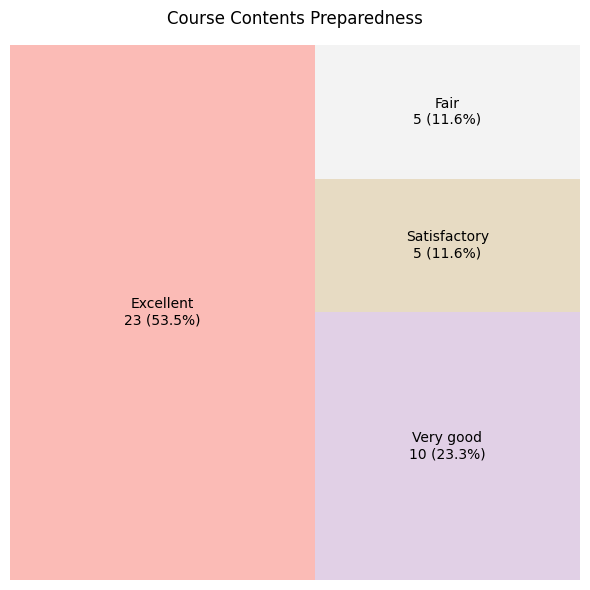

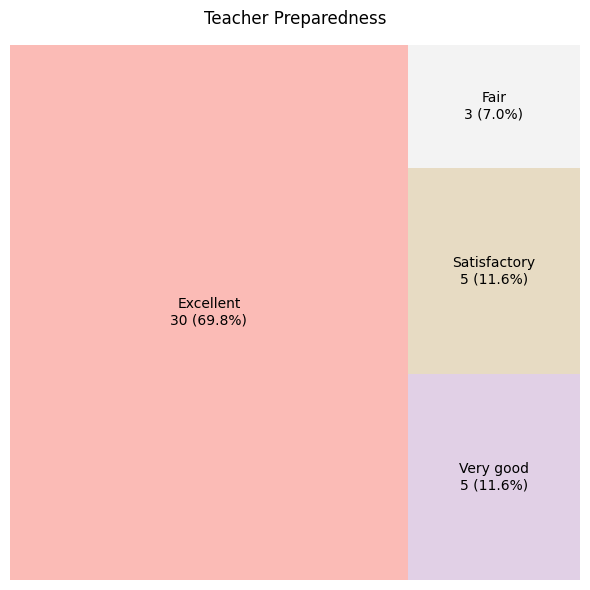

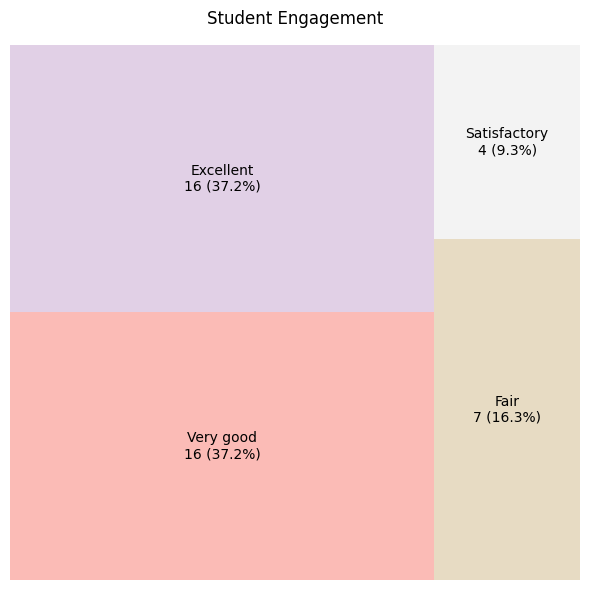

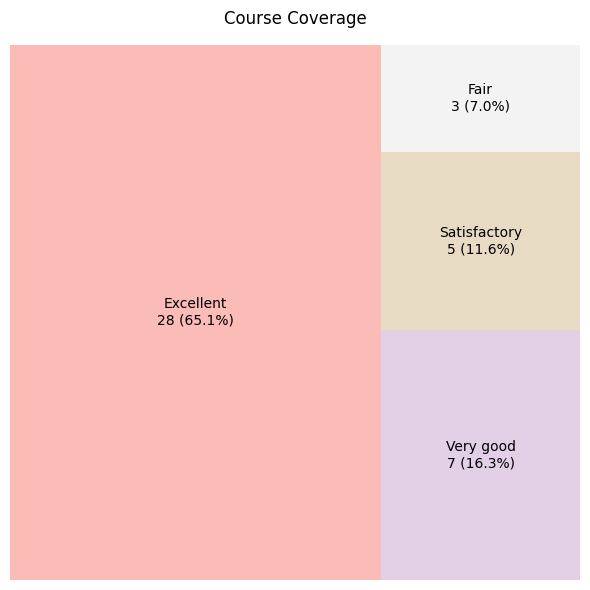

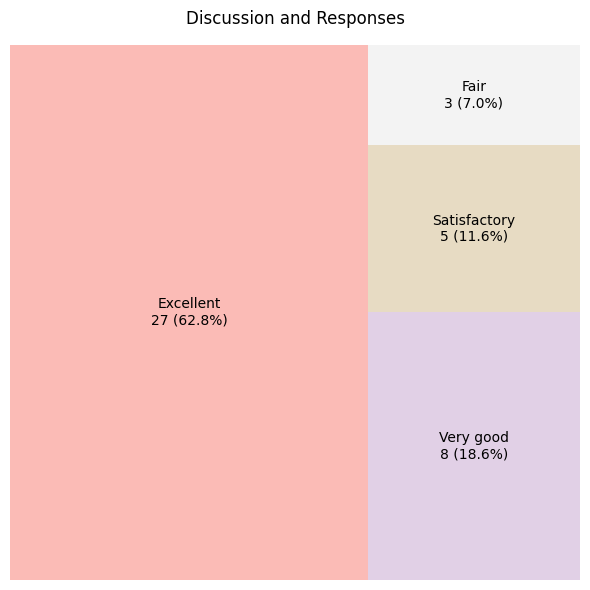

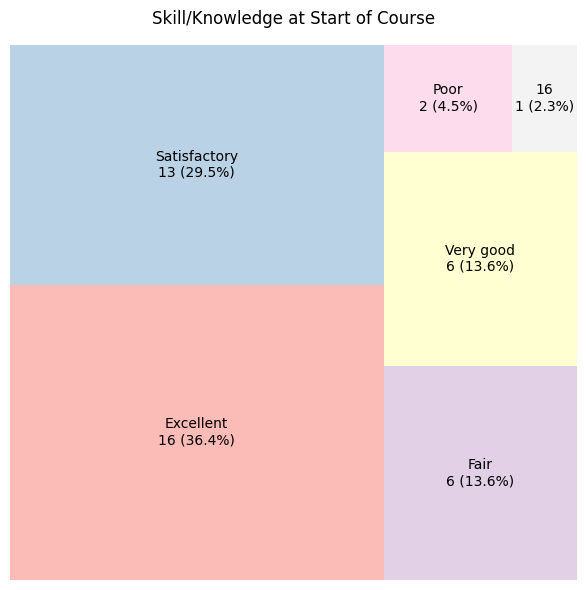

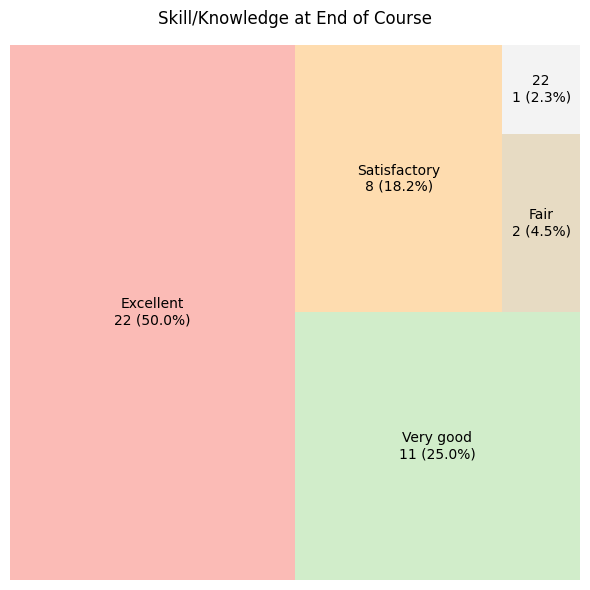

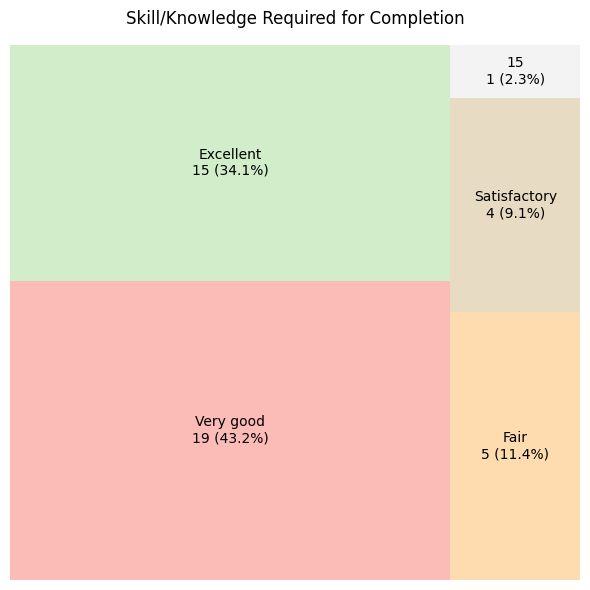

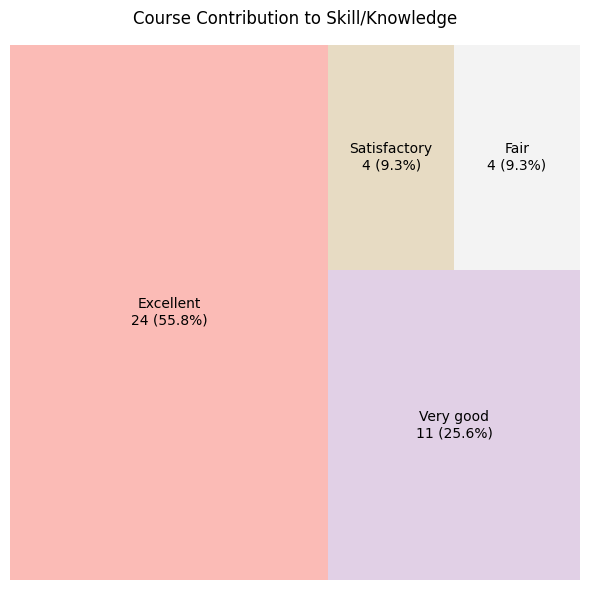

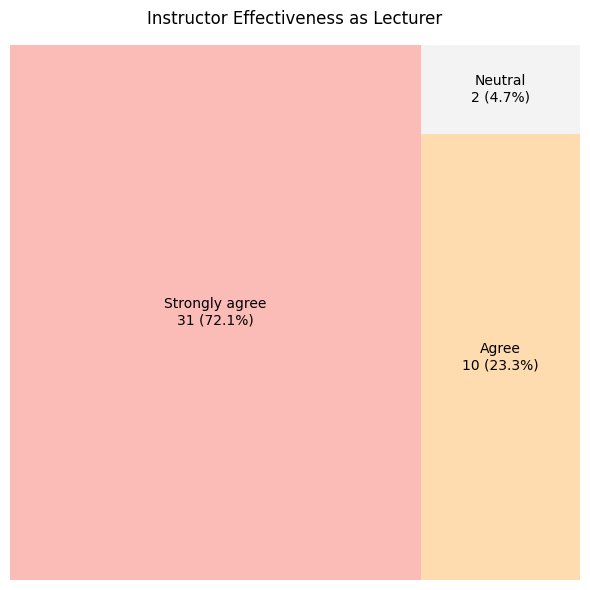

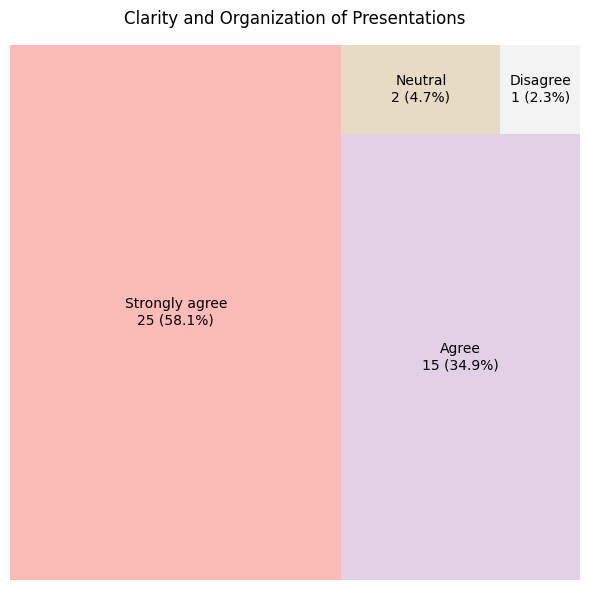

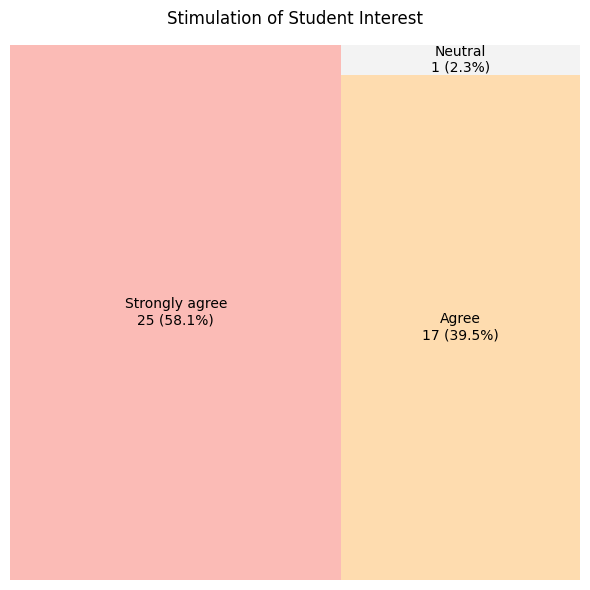

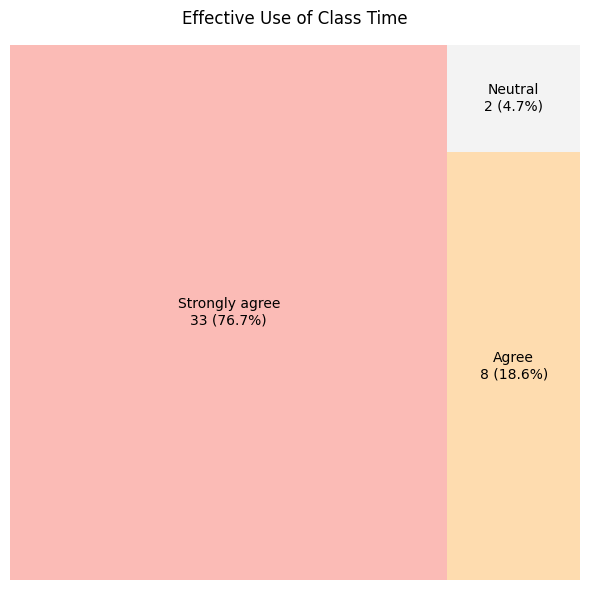

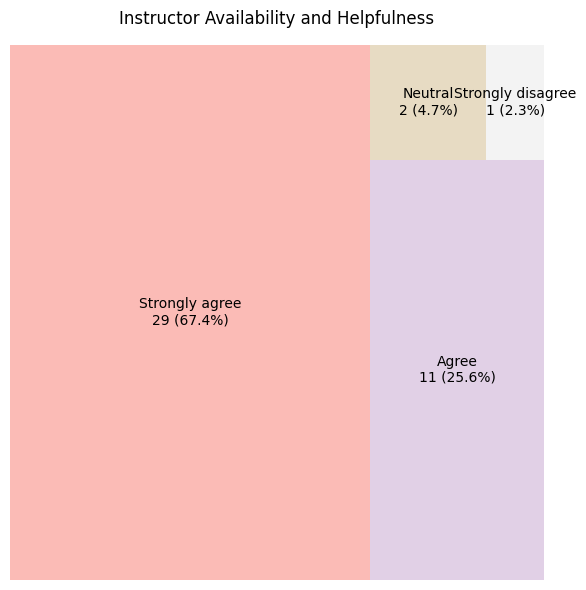

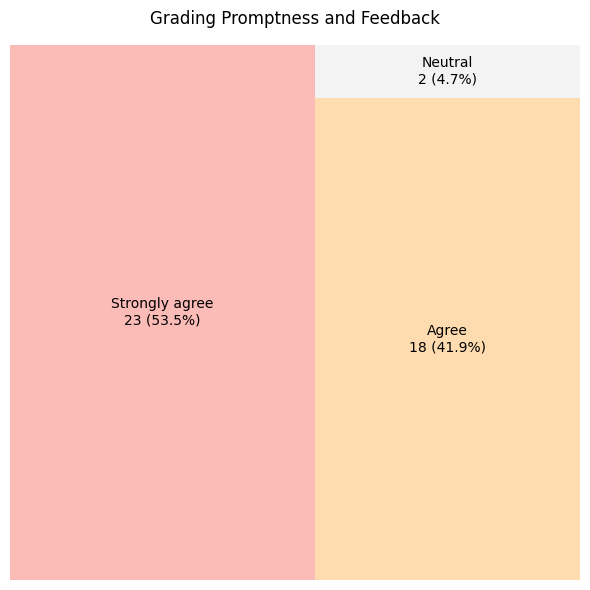

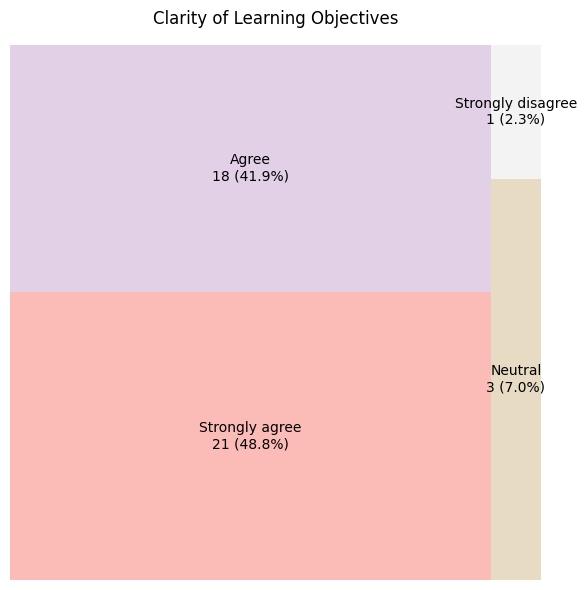

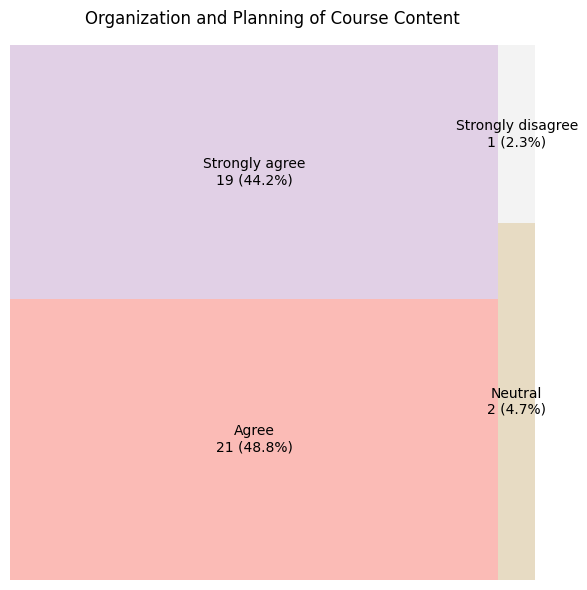

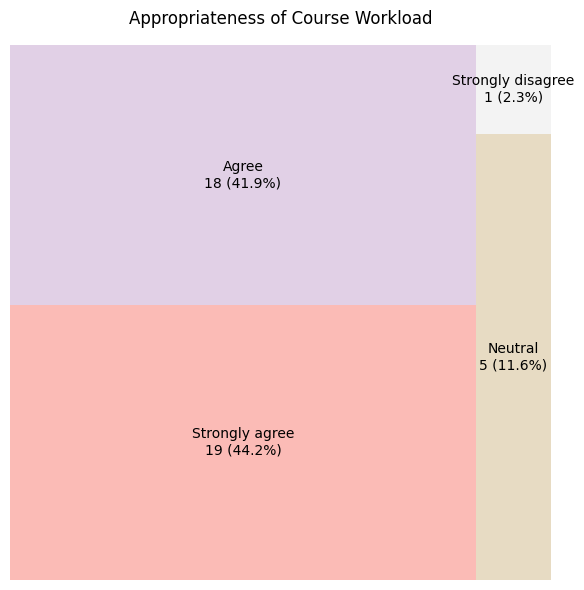

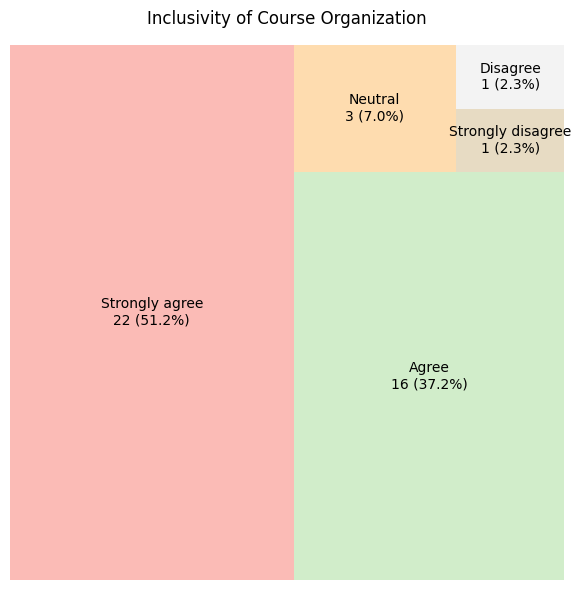

In [17]:
import squarify
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba

# Titles for each graph based on column context
titles = {
    3: "Course Contents Preparedness",
    4: "Teacher Preparedness",
    5: "Student Engagement",
    6: "Course Coverage",
    7: "Discussion and Responses",
    8: "Skill/Knowledge at Start of Course",
    9: "Skill/Knowledge at End of Course",
    10: "Skill/Knowledge Required for Completion",
    11: "Course Contribution to Skill/Knowledge",
    12: "Instructor Effectiveness as Lecturer",
    13: "Clarity and Organization of Presentations",
    14: "Stimulation of Student Interest",
    15: "Effective Use of Class Time",
    16: "Instructor Availability and Helpfulness",
    17: "Grading Promptness and Feedback",
    18: "Clarity of Learning Objectives",
    19: "Organization and Planning of Course Content",
    20: "Appropriateness of Course Workload",
    21: "Inclusivity of Course Organization"
}

# Custom function for generating pastel colors
def generate_pastel_colors(num_colors):
    np.random.seed(42)  # Ensure reproducibility
    base_colors = plt.cm.Pastel1(np.linspace(0, 1, num_colors))
    return [to_rgba(color, alpha=0.9) for color in base_colors]

# Iterate over each specified column and generate a treemap
for col_index in range(3, 22):  # Columns 3 to 21 inclusive
    # Extract column data and counts
    column_name = df.columns[col_index]
    values = df[column_name].value_counts()  # Count unique values

    # Prepare labels with percentages and counts
    total = values.sum()
    labels = [
        f"{category}\n{count} ({count / total:.1%})"
        for category, count in zip(values.index, values.values)
    ]

    # Generate a pastel color palette for the current column
    colors = generate_pastel_colors(len(values))

    # Create and save the treemap
    plt.figure(figsize=(6, 6))  # Larger figure size for better visibility
    squarify.plot(
        sizes=values.values,
        label=labels,
        alpha=0.9,
        color=colors,
        text_kwargs={'fontsize': 10, 'color': 'black'},  # Removed bold from text
        linewidth=1.2  # Set border thickness
    )

    # Remove axis for a clean and professional look
    plt.axis('off')

    # Set the title with improved alignment and font styling
    plt.title(titles[col_index], fontsize=12, loc='center', pad=15, color='black')

    # Tighten the layout for better spacing
    plt.tight_layout()

    # Display the treemap
    plt.show()

**Planteamiento de diagrama con las palabras comunes en la ejecución**
Palabras empleadas por cada pregunta

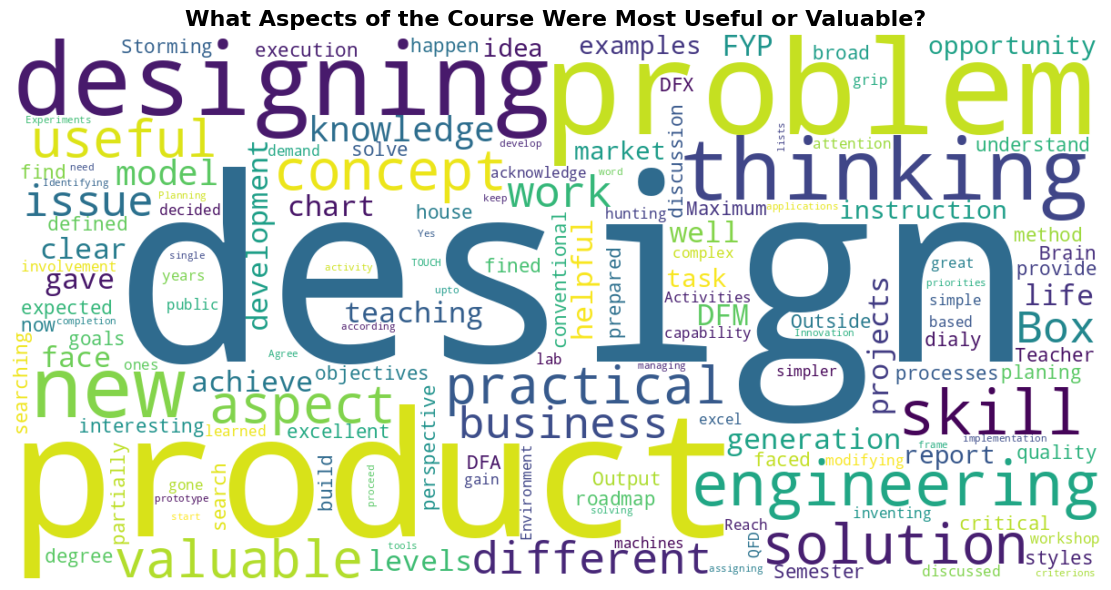

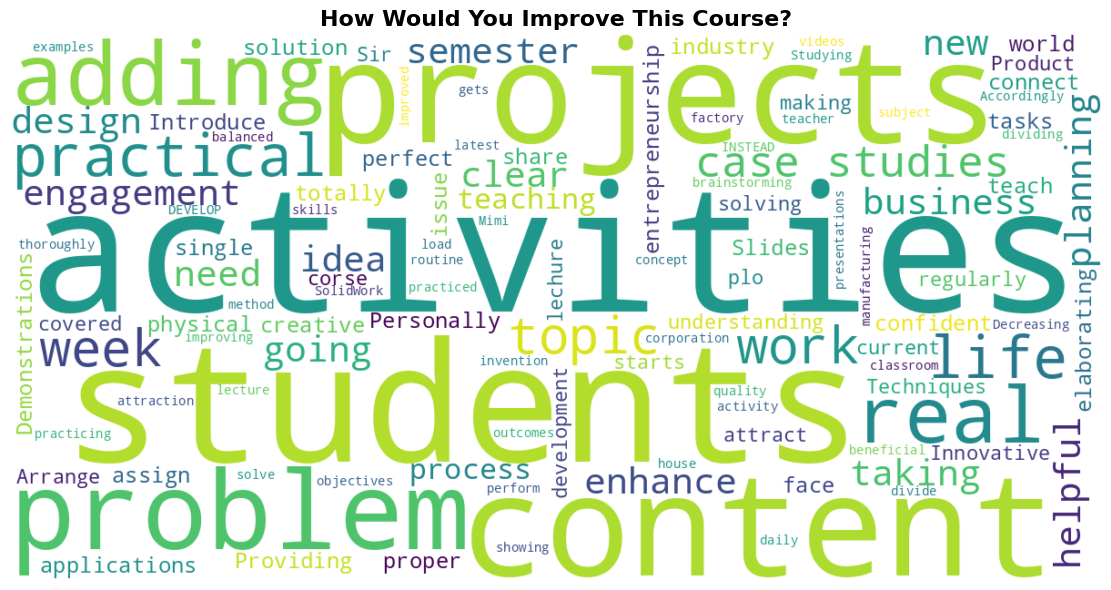

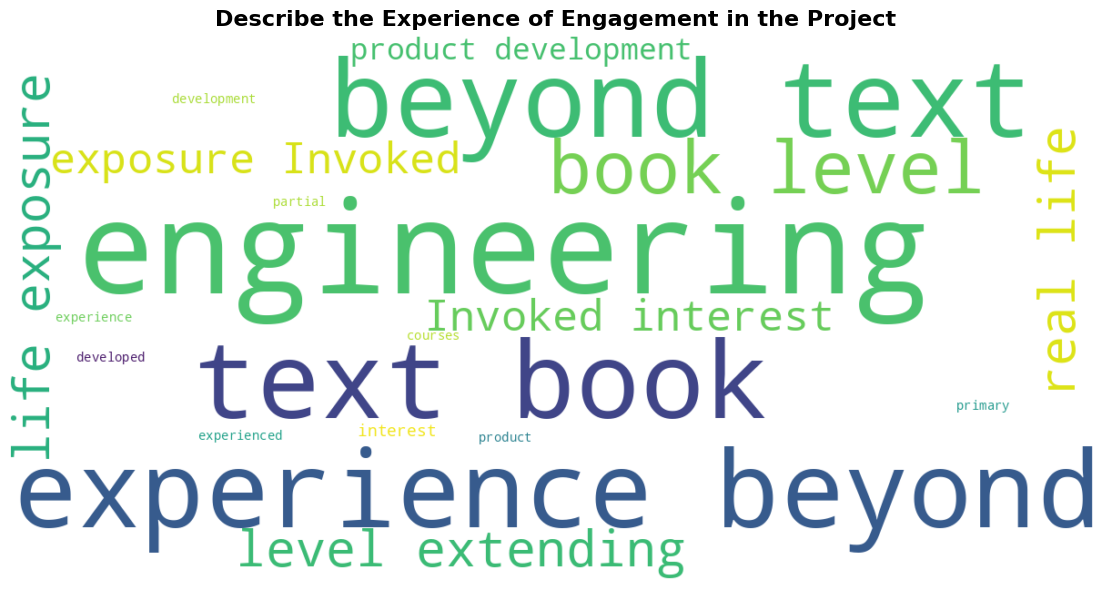

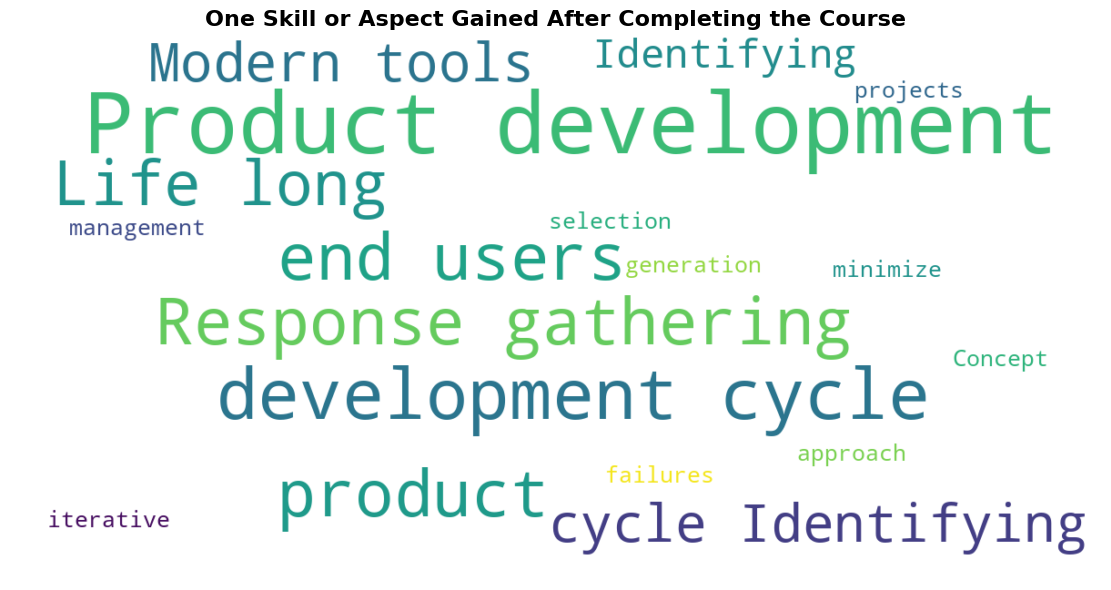

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define custom stopwords
custom_stopwords = set(STOPWORDS).union({
    "see", "lot", "able", "soon", "got", "like", "thing", "wanna", "get",
    "think", "add", "will", "make", "give", "good", "also", "even", "more",
    "one", "time", "student", "course", "help", "project", "learn", "learning",
    "would", "improve", "way", "class", "use", "used", "helped", "dfme", "things",
    "gantt", "given", "every", "certain", "us", "thier", "many", "often", "kind",
    "around", "type", "want", "go", "part", "Firstly", "related", "repeat",
    "ascept", "tart", "especially", "tod", "soft", "enough", "multiple", "trip",
    "theoritical", "Nadeem", "done", "big", "show", "clo", "donig", "durong",
    "etc", "presentation", "made", "atleast", "looks", "check", "mini", "telling",
    "Please", "note", "classes", "recommend", "show", "similar", "generally",
    "needed", "involved", "certeria"
})

# Function to generate a word cloud for a single column
def generate_word_cloud(column_data, title, filename):
    # Combine all text in the column
    text = ' '.join(column_data.dropna().astype(str))

    # Generate the word cloud
    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='white',
        stopwords=custom_stopwords,
        colormap='viridis',
        max_words=150
    ).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(filename, dpi=300)  # Save as a high-resolution image
    plt.show()

# Generate word clouds for each column
generate_word_cloud(df["What aspects of this course were most useful or valuable?"],
                    "What Aspects of the Course Were Most Useful or Valuable?",
                    "useful_aspects_wordcloud.png")

generate_word_cloud(df["How would you improve this course?"],
                    "How Would You Improve This Course?",
                    "improve_course_wordcloud.png")

generate_word_cloud(df["Describe the experience of engagement in the project assigned in this course"],
                    "Describe the Experience of Engagement in the Project",
                    "engagement_experience_wordcloud.png")

generate_word_cloud(df["Name one skill or aspect that you gained after completing this course"],
                    "One Skill or Aspect Gained After Completing the Course",
                    "skills_gained_wordcloud.png")

**Renombramiento de las columnas dentro del DataFrame para una mejor comprensión y lectura de la información**

In [20]:
# Make a copy of the original DataFrame
df_copy = df.copy()

# List of new column titles
new_column_titles = [
    "Timestamp",
    "Name of Student",
    "Registration Number",
    "Course Content Preparedness",
    "Teacher Preparedness",
    "Student Engagement",
    "Course Coverage",
    "Discussion and Response",
    "Skill/Knowledge at Start",
    "Skill/Knowledge at End",
    "Skill/Knowledge Required",
    "Contribution to Skill/Knowledge",
    "Instructor Effectiveness",
    "Presentation Clarity",
    "Stimulation of Interest",
    "Effective Use of Time",
    "Instructor Availability",
    "Grading and Feedback",
    "Clarity of Learning Objectives",
    "Organization and Planning",
    "Appropriateness of Workload",
    "Student Participation",
    "Course Usefulness",
    "Course Improvement Suggestions",
    "Project Engagement Experience",
    "Skills or Aspects Gained"
]

# Ensure the number of columns in the copied DataFrame matches the new column titles
if len(df_copy.columns) == len(new_column_titles):
    df_copy.columns = new_column_titles
else:
    raise ValueError("The number of columns in the DataFrame does not match the number of provided titles.")

# Display the updated DataFrame
df_copy.head()

,Timestamp,Name of Student,Registration Number,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,...,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation,Course Usefulness,Course Improvement Suggestions,Project Engagement Experience,Skills or Aspects Gained
0,2024-05-25 14:54:06.007,Arhum Waseem,1024-BSME-FET/F-21,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,...,Neutral,Agree,Agree,Agree,Agree,Agree,Design For Maximum Output,By Providing Slides To Students,Learning experience beyond text book level ext...,Life long learning
1,2024-05-25 14:56:59.385,Saud Asif,990-FET/BSME/F21,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,"Brain Storming for solution of a problem, proj...",Introduce projects that connect students with ...,Learning experience beyond text book level ext...,Identifying the end users and Response gatheri...
2,2024-05-25 14:59:13.970,Muhammad Hammad Sohail,1012-FET/BSME/F21,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,"We learn different skills like gantt chart, df...",One things i wanna improve in this course is i...,Learning experience beyond text book level ext...,"Product development cycle, Use of Modern tools..."
3,2024-05-25 15:07:56.230,Muhammad Amir Taj,997/F21/BSME,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,The course had well-defined objectives and goa...,I think the course was perfect.,Learning experience beyond text book level ext...,"Use of Modern tools in product development, Li..."
4,2024-05-25 15:12:50.812,M.Talha saoud,1002/bsme/f-21,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,This help me to improve my skills for a busine...,Please add some content related to entrepreneu...,Learning experience beyond text book level ext...,Life long learning


**Eliminación de columnas que tienen índices de tiempo o el nombre y registro de los estudiantes**

Esto debido a la importancia que se le mantiene a los datos sensibles

In [21]:
# Calculate indices of columns to remove
columns_to_remove_indices = [0, 1, 2] + list(range(df_copy.shape[1] - 3, df_copy.shape[1]))
df_copy = df_copy.drop(columns=df_copy.columns[columns_to_remove_indices])

# Display the updated DataFrame
df_copy.head()

,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,Skill/Knowledge Required,Contribution to Skill/Knowledge,Instructor Effectiveness,Presentation Clarity,Stimulation of Interest,Effective Use of Time,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation,Course Usefulness
0,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,Very good,Very good,Agree,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree,Design For Maximum Output
1,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,Very good,Very good,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,"Brain Storming for solution of a problem, proj..."
2,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,"We learn different skills like gantt chart, df..."
3,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,The course had well-defined objectives and goa...
4,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,This help me to improve my skills for a busine...


**Eliminación de columna de opiniones**

Para el análisis de los datos resulta necesario la eliminación de datos que pueden ser subjetivos y únicamente considerar los datos categóricos en las encuestas realizadas.

In [22]:
# Delete the last column in df_copy
df_copy = df_copy.iloc[:, :-1]

# Display the updated DataFrame
df_copy.head()

,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,Skill/Knowledge Required,Contribution to Skill/Knowledge,Instructor Effectiveness,Presentation Clarity,Stimulation of Interest,Effective Use of Time,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation
0,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,Very good,Very good,Agree,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree
1,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,Very good,Very good,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree
2,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
4,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree


**Eliminación del último registro realizado**

Creación de otra copia del dataframe con la eliminación de la última fila

In [23]:
# Delete the last row from df_copy
df_copy = df_copy.iloc[:-1]

# Display the updated DataFrame
df_copy

,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,Skill/Knowledge Required,Contribution to Skill/Knowledge,Instructor Effectiveness,Presentation Clarity,Stimulation of Interest,Effective Use of Time,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation
0,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,Very good,Very good,Agree,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree
1,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,Very good,Very good,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree
2,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
4,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,Excellent,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
5,Excellent,Excellent,Fair,Very good,Excellent,Satisfactory,Excellent,Satisfactory,Excellent,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Neutral,Neutral
6,Satisfactory,Satisfactory,Excellent,Excellent,Very good,Satisfactory,Excellent,Very good,Excellent,Strongly agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree,Agree
7,Excellent,Excellent,Excellent,Excellent,Excellent,Very good,Excellent,Very good,Excellent,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
8,Very good,Very good,Very good,Excellent,Excellent,Excellent,Excellent,Very good,Excellent,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree
9,Very good,Excellent,Very good,Excellent,Very good,Fair,Very good,Very good,Satisfactory,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Neutral,Agree,Strongly agree,Neutral,Agree


Personalización del mapeo, en donde se han codificado los datos, y pasan a ser de tipo numérico, aunque permanezcan categóricos.

In [24]:
# Drop the last row (if not already removed)
df_copy = df_copy.iloc[:-1]

# Define custom mappings
custom_mappings = {
    "Course Content Preparedness": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Teacher Preparedness": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Student Engagement": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Course Coverage": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Discussion and Response": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Skill/Knowledge at Start": {"Poor": 1, "Fair": 2, "Satisfactory": 3, "Very good": 4, "Excellent": 5},
    "Skill/Knowledge at End": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Skill/Knowledge Required": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Contribution to Skill/Knowledge": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Instructor Effectiveness": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Presentation Clarity": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Stimulation of Interest": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Effective Use of Time": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Instructor Availability": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Grading and Feedback": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Clarity of Learning Objectives": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Organization and Planning": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Appropriateness of Workload": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Student Participation": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
}

# Apply custom mappings
df_encoded = df_copy.copy()
for column, mapping in custom_mappings.items():
    df_encoded[column] = df_encoded[column].map(mapping)

# Display the encoded DataFrame
print("Encoded DataFrame:")
df_encoded.head()

Encoded DataFrame:


,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,Skill/Knowledge Required,Contribution to Skill/Knowledge,Instructor Effectiveness,Presentation Clarity,Stimulation of Interest,Effective Use of Time,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation
0,3,3,2,4,4,3,3,3,3,3,3,3,3,3,3,4,4,4,4
1,4,4,3,4,4,2,4,3,3,4,4,3,4,5,4,5,4,4,5
2,4,3,4,4,4,4,4,4,4,3,4,4,4,5,4,5,5,5,5
3,4,4,3,4,4,5,4,4,4,4,4,4,4,5,4,5,5,5,5
4,4,4,3,3,3,5,4,4,4,4,4,4,4,5,4,1,1,1,1


Verificación del ajuste en los datos ajustados de categoría de string a numéricos

In [25]:
# Display the mapping for verification
print("\nCustom Mappings Applied:")
for column, mapping in custom_mappings.items():
    print(f"{column}: {mapping}")


Custom Mappings Applied:
Course Content Preparedness: {'Fair': 1, 'Satisfactory': 2, 'Very good': 3, 'Excellent': 4}
Teacher Preparedness: {'Fair': 1, 'Satisfactory': 2, 'Very good': 3, 'Excellent': 4}
Student Engagement: {'Fair': 1, 'Satisfactory': 2, 'Very good': 3, 'Excellent': 4}
Course Coverage: {'Fair': 1, 'Satisfactory': 2, 'Very good': 3, 'Excellent': 4}
Discussion and Response: {'Fair': 1, 'Satisfactory': 2, 'Very good': 3, 'Excellent': 4}
Skill/Knowledge at Start: {'Poor': 1, 'Fair': 2, 'Satisfactory': 3, 'Very good': 4, 'Excellent': 5}
Skill/Knowledge at End: {'Fair': 1, 'Satisfactory': 2, 'Very good': 3, 'Excellent': 4}
Skill/Knowledge Required: {'Fair': 1, 'Satisfactory': 2, 'Very good': 3, 'Excellent': 4}
Contribution to Skill/Knowledge: {'Fair': 1, 'Satisfactory': 2, 'Very good': 3, 'Excellent': 4}
Instructor Effectiveness: {'Disagree': 1, 'Neutral': 2, 'Agree': 3, 'Strongly agree': 4}
Presentation Clarity: {'Disagree': 1, 'Neutral': 2, 'Agree': 3, 'Strongly agree': 4}


###Empleo del Elbow Method

Importación de las librerías y métodos para la medición y cálculo del método Elbow

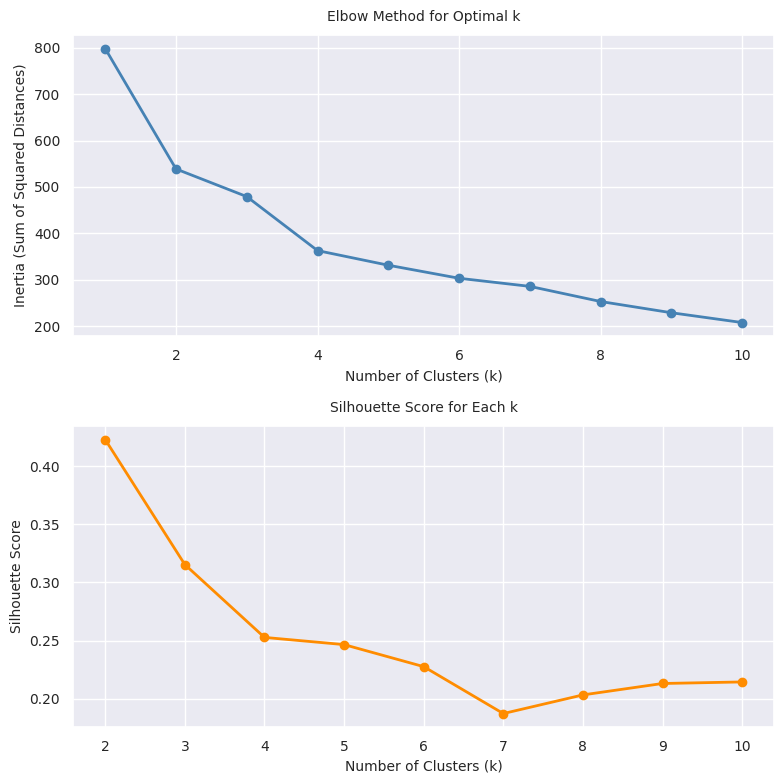

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Use the elbow method and calculate Silhouette Score for each k
inertia = []
sil_scores = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

    # Only calculate silhouette score for k >= 2
    if k > 1:
        sil_score = silhouette_score(df_scaled, kmeans.labels_)
        sil_scores.append(sil_score)
    else:
        sil_scores.append(None)

# Apply minimalist styling with a clean grid
sns.set(style="darkgrid")  # Use Seaborn's darkgrid theme for a professional look
plt.figure(figsize=(8, 8))  # Set figure size

# Elbow Curve (Inertia)
plt.subplot(2, 1, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-', color='steelblue', linewidth=2, markersize=6)
plt.title('Elbow Method for Optimal k', fontsize=10, pad=10)
plt.xlabel('Number of Clusters (k)', fontsize=10)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Silhouette Score
plt.subplot(2, 1, 2)
plt.plot(k_range[1:], sil_scores[1:], marker='o', linestyle='-', color='darkorange', linewidth=2, markersize=6)
plt.title('Silhouette Score for Each k', fontsize=10, pad=10)
plt.xlabel('Number of Clusters (k)', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Al emplear el elbow method se hace la búsqueda del codo en el gráfico, de modo que se conozca el número de klusters ideal, en ese caso, se considera que es de k=3, ya que a partir de ese punto es que comienza una disminución en inercia.

En el caso de la silueta, es empleada para evaluar la cálidad del clustering, en ese sentido, k=2 tiene el valor más alto, pero igualmente 3 o 4 pueden ser buenas opciones al considerar características como la granularidad.

###Normalización de la información

Posterior a la identificación de la cantidad de clusters que es adecuada, se emplea un método de normalización de datos y en donde se grafican a grandes rasgos la información obtenida de la encuesta después de la transformación de información y se visualizan de cada cluster

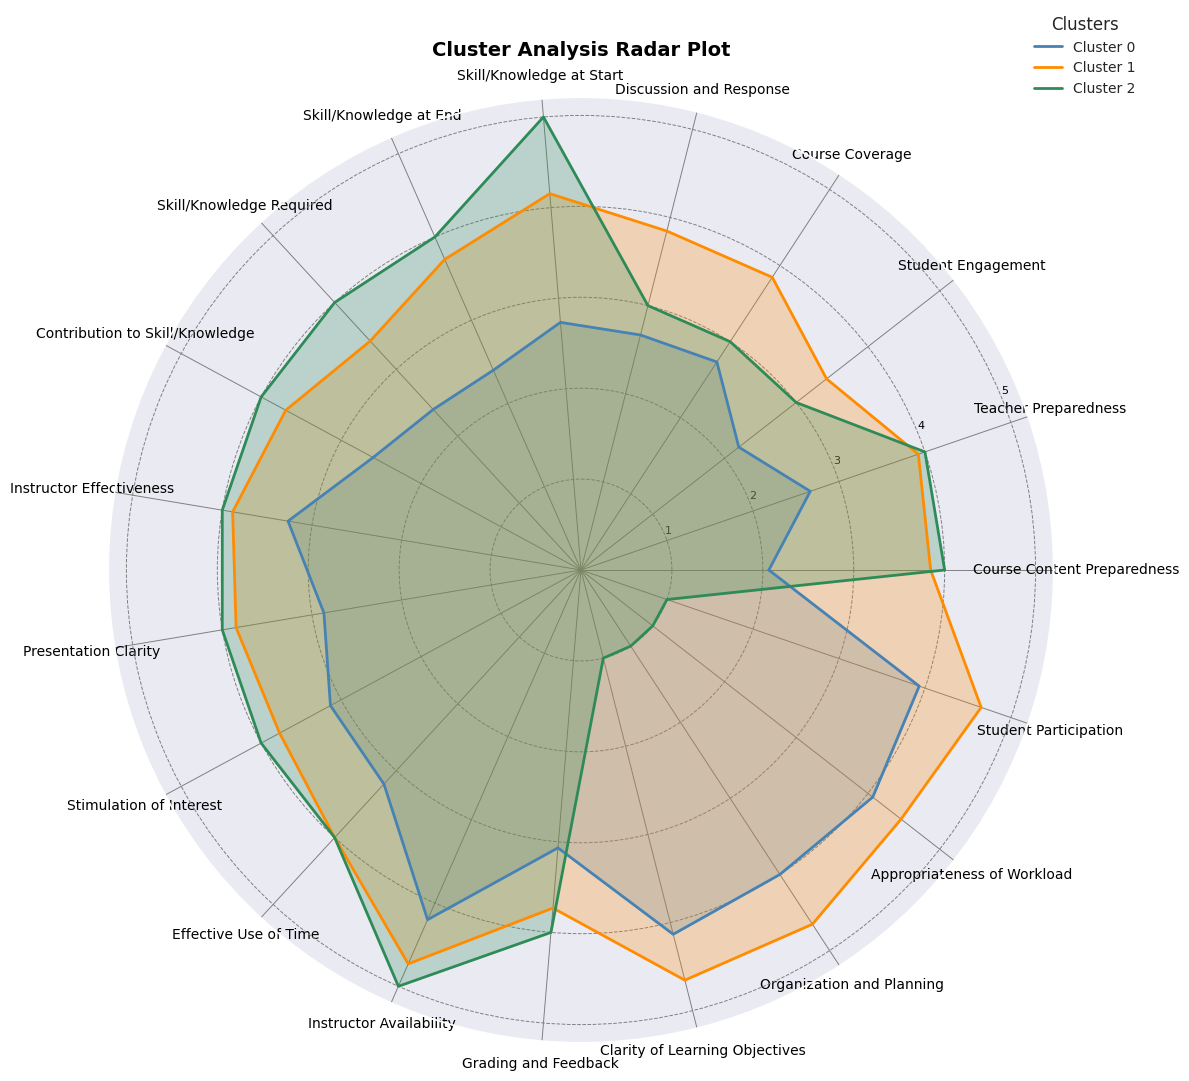

In [28]:
# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Apply k-means clustering with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze each cluster by feature averages
cluster_averages = df_encoded.groupby('Cluster').mean()

# Define the features for the radar plot
features = cluster_averages.columns.tolist()
num_features = len(features)

# Add the first feature to the end to close the radar plot
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]

# Minimalist styling for the radar plot with polar lines
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))  # Set a square figure size

# Plot each cluster with polar lines
colors = ['steelblue', 'darkorange', 'seagreen']  # Colors for clusters
for cluster in range(cluster_averages.shape[0]):
    values = cluster_averages.iloc[cluster].tolist()
    values += values[:1]  # Close the polygon
    ax.plot(angles, values, label=f'Cluster {cluster}', linewidth=2, color=colors[cluster], linestyle='solid')
    ax.fill(angles, values, alpha=0.25, color=colors[cluster])  # Use slight transparency for the fill

# Add labels for the features
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=10, color='black')  # Use clean, readable labels

# Customize gridlines and add polar lines
ax.tick_params(axis='y', labelsize=8, colors='black')  # Adjust radial tick labels
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')  # Circular gridlines
ax.xaxis.grid(True, linestyle='-', linewidth=0.7, color='gray')  # Polar (radial) gridlines

# Add title and legend
plt.title('Cluster Analysis Radar Plot', size=14, pad=30, color='black', fontweight='bold')  # Title styling
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10, frameon=False, title='Clusters')

# Adjust layout and display
plt.tight_layout()
plt.show()

Cluster assignments:
Cluster
1    26
0    15
2     1
Name: count, dtype: int64

Cluster analysis (feature averages):
         Course Content Preparedness  Teacher Preparedness  \
Cluster                                                      
0                           2.066667              2.666667   
1                           3.846154              3.923077   
2                           4.000000              4.000000   

         Student Engagement  Course Coverage  Discussion and Response  \
Cluster                                                                 
0                  2.200000         2.733333                 2.666667   
1                  3.423077         3.846154                 3.846154   
2                  3.000000         3.000000                 3.000000   

         Skill/Knowledge at Start  Skill/Knowledge at End  \
Cluster                                                     
0                        2.733333                2.400000   
1                      

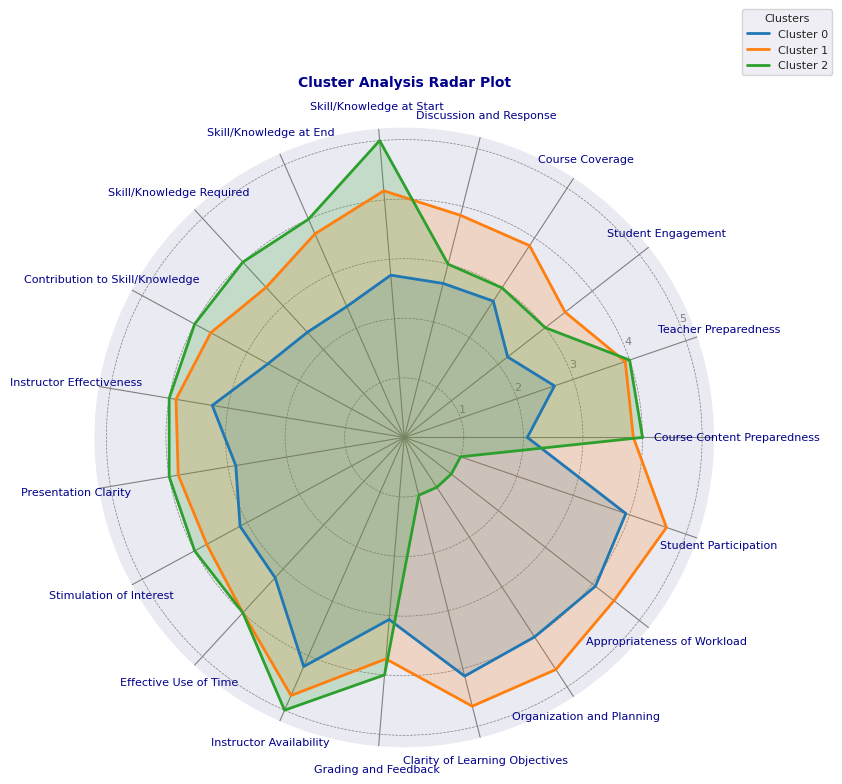


Cluster analysis DataFrame (feature averages):


,Cluster,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,Skill/Knowledge Required,Contribution to Skill/Knowledge,Instructor Effectiveness,Presentation Clarity,Stimulation of Interest,Effective Use of Time,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation
0,0,2.066667,2.666667,2.200000,2.733333,2.666667,2.733333,2.400000,2.400000,2.600000,3.266667,2.866667,3.133333,3.2,4.200000,3.066667,4.133333,4.000000,4.066667,3.933333
1,1,3.846154,3.923077,3.423077,3.846154,3.846154,4.153846,3.730769,3.423077,3.692308,3.884615,3.846154,3.769231,4.0,4.730769,3.730769,4.653846,4.653846,4.461538,4.653846
2,2,4.000000,4.000000,3.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Step 1: Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Step 2: Apply k-means clustering with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

# Step 3: Analyze the clusters
# Display the cluster assignments
print("Cluster assignments:")
print(df_encoded['Cluster'].value_counts())

# Analyze each cluster by feature averages
cluster_analysis = df_encoded.groupby('Cluster').mean()
print("\nCluster analysis (feature averages):")
print(cluster_analysis)

# Step 4: Polar (Radar) plot for cluster analysis
# Calculate the average values for each feature in each cluster
cluster_averages = df_encoded.groupby('Cluster').mean()

# Define the features for the radar plot
features = cluster_averages.columns.tolist()
num_features = len(features)

# Add the first feature to the end to close the radar plot
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]

# Set up a color palette for clusters
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # List of colors for clusters

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Plot each cluster
for cluster in range(cluster_averages.shape[0]):
    values = cluster_averages.iloc[cluster].tolist()
    values += values[:1]  # Close the polygon
    ax.plot(angles, values, label=f'Cluster {cluster}', linewidth=2, color=colors[cluster])
    ax.fill(angles, values, alpha=0.2, color=colors[cluster])

# Add labels for the features
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=8, color='darkblue')  # Set font size and color

# Customize the radar plot appearance
ax.tick_params(axis='y', labelsize=8, colors='gray')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.xaxis.grid(True, linestyle='-', linewidth=0.8, color='gray')
ax.spines['polar'].set_visible(False)  # Remove outer polar spine

# Add a title and legend with professional styling
plt.title('Cluster Analysis Radar Plot', size=10, pad=30, color='darkblue', fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2), fontsize=8, frameon=True, title='Clusters', title_fontsize=8)

# Show the radar plot
plt.tight_layout()
plt.show()

# Step 5: Create a new DataFrame for Cluster Analysis (Feature Averages)
cluster_analysis_df = cluster_averages.reset_index()

# Display the new DataFrame containing cluster feature averages
print("\nCluster analysis DataFrame (feature averages):")
cluster_analysis_df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-31-7b0dd6684e90>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Improvement Sentiment Category', palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])


                   How would you improve this course?  \
0                     By Providing Slides To Students   
1   Introduce projects that connect students with ...   
2   One things i wanna improve in this course is i...   
3                     I think the course was perfect.   
4   Please add some content related to entrepreneu...   
5                By doing practical class activities    
6   By elaborating course content and doing more c...   
7                     get proper time to this course    
8   If there we add more physical projects in this...   
9                        By Practical Demonstrations.   
10                     Course content is good enough    
11  Course teach totally theoritical and most cont...   
12  The Course content was good but we can improve...   
13  By telling what clo/plo and what corse content...   
14                                   More engagement    
15                   by adding some more case studies   
16  I will improve this course 

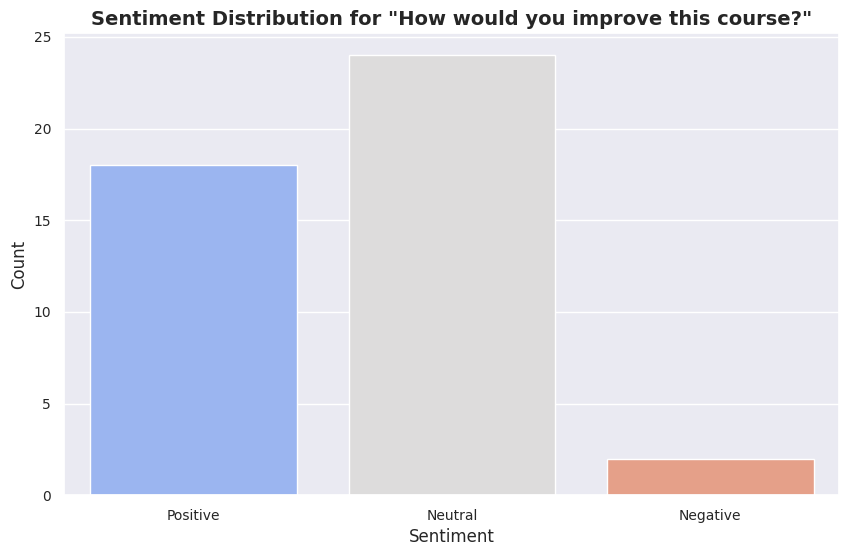

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Ensure VADER lexicon is downloaded
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Ensure all values are strings and replace NaN or missing values with an empty string
df['How would you improve this course?'] = df['How would you improve this course?'].fillna('').astype(str)

# Analyze the sentiment for the column
def analyze_sentiment(text):
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']  # Return compound score (-1 to 1)

# Apply sentiment analysis to the column
df['Improvement Sentiment Score'] = df['How would you improve this course?'].apply(analyze_sentiment)

# Categorize sentiment based on the compound score
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Improvement Sentiment Category'] = df['Improvement Sentiment Score'].apply(categorize_sentiment)

# Display the updated DataFrame
print(df[['How would you improve this course?', 'Improvement Sentiment Score', 'Improvement Sentiment Category']])

# Visualization: Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Improvement Sentiment Category', palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution for "How would you improve this course?"', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()